# Cluster


This notebook provides a comprehensive guide on implementing Cluster using scikit-learn libraries.

By: Bryce Li, NUS

## What is Hierarchical Clustering?
Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

Hierarchical clustering has a couple of key benefits:

* There is no need to pre-specify the number of clusters. Instead, the dendrogram can be cut at the appropriate level to obtain the desired number of clusters.
* Data is easily summarized/organized into a hierarchy using dendrograms. Dendrograms make it easy to examine and interpret clusters.

## Applications
There are many real-life applications of Hierarchical clustering. They include:

* Bioinformatics: grouping animals according to their biological features to reconstruct phylogeny trees
* Business: dividing customers into segments or forming a hierarchy of employees based on salary.
* Image processing: grouping handwritten characters in text recognition based on the similarity of the character shapes.
* Information Retrieval: categorizing search results based on the query.


## Hierarchical clustering types
There are two main types of hierarchical clustering:

* Agglomerative: Initially, each object is considered to be its own cluster. According to a particular procedure, the clusters are then merged step by step until a single cluster remains. At the end of the cluster merging process, a cluster containing all the elements will be formed.
* Divisive: The Divisive method is the opposite of the Agglomerative method. Initially, all objects are considered in a single cluster. Then the division process is performed step by step until each object forms a different cluster. The cluster division or splitting procedure is carried out according to some principles that maximum distance between neighboring objects in the cluster.

Between Agglomerative and Divisive clustering, Agglomerative clustering is generally the preferred method. The below example will focus on Agglomerative clustering algorithms because they are the most popular and easiest to implement.

## Hierarchical clustering steps
Hierarchical clustering employs a measure of distance/similarity to create new clusters. Steps for Agglomerative clustering can be summarized as follows:

* Step 1: Compute the proximity matrix using a particular distance metric
* Step 2: Each data point is assigned to a cluster
* Step 3: Merge the clusters based on a metric for the similarity between clusters
* Step 4: Update the distance matrix
* Step 5: Repeat Step 3 and Step 4 until only a single cluster remains

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

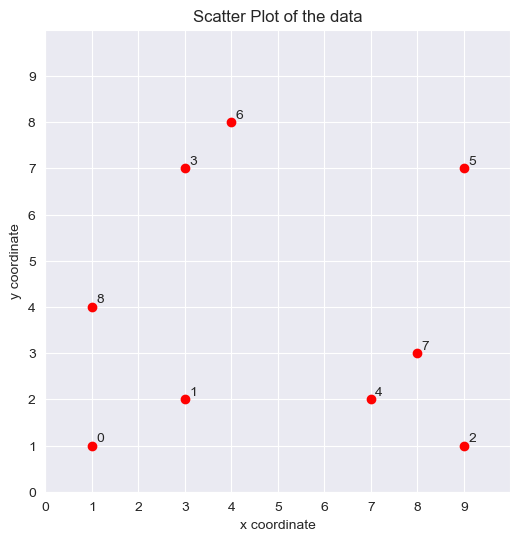

In [3]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

## Hierarchical Clustering using Scipy
The Scipy library has the linkage function for hierarchical (agglomerative) clustering.

The linkage function has several methods available for calculating the distance between clusters: single, average, weighted, centroid, median, and ward. We will compare these methods below. For more details on the linkage function, see the docs.

To draw the dendrogram, we'll use the dendrogram function. Again, for more details of the dendrogram function, see the docs.

First, we will import the required functions, and then we can form linkages with the various methods:

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

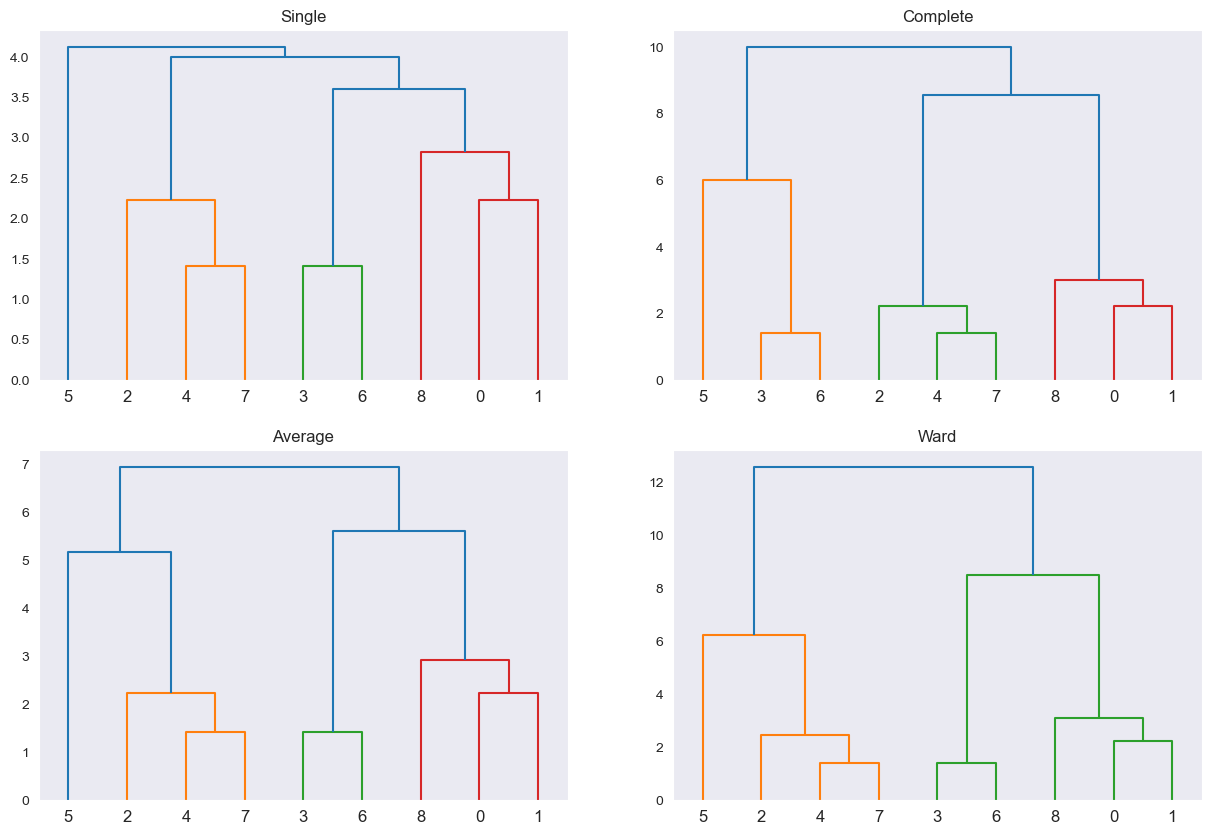

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

Notice that each distance method produces different linkages for the same data.

Finally, let's use the fcluster function to find the clusters for the Ward linkage

In [6]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


## Hierarchical Clustering using Scikit-Learn

In [7]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


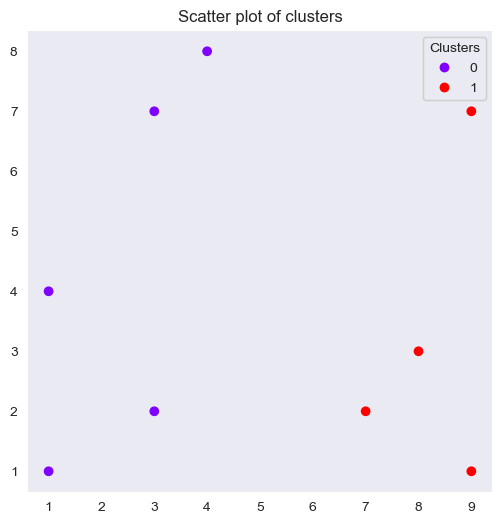

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

## Clustering a real dataset

In the previous section, hierarchical clustering was performed on a simple data set. In the following section, hierarchical clustering will be performed on real-world data to solve a real problem.

Here, we use a dataset from the book Biostatistics with R, which contains information for nine different protein sources and their respective consumption from various countries. We'll use this data to group countries according to their protein consumption.

First, we'll read in the CSV and display the first few rows of data:

In [9]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [10]:
X2 = df.iloc[:,1:10]

Again, we use the linkage function for clustering the data:

In [11]:
Z2 = linkage(X2, method='ward', metric='euclidean')

Finally, we can plot a dendrogram of the ward linkage clustering of 25 countries based on their protein consumption:

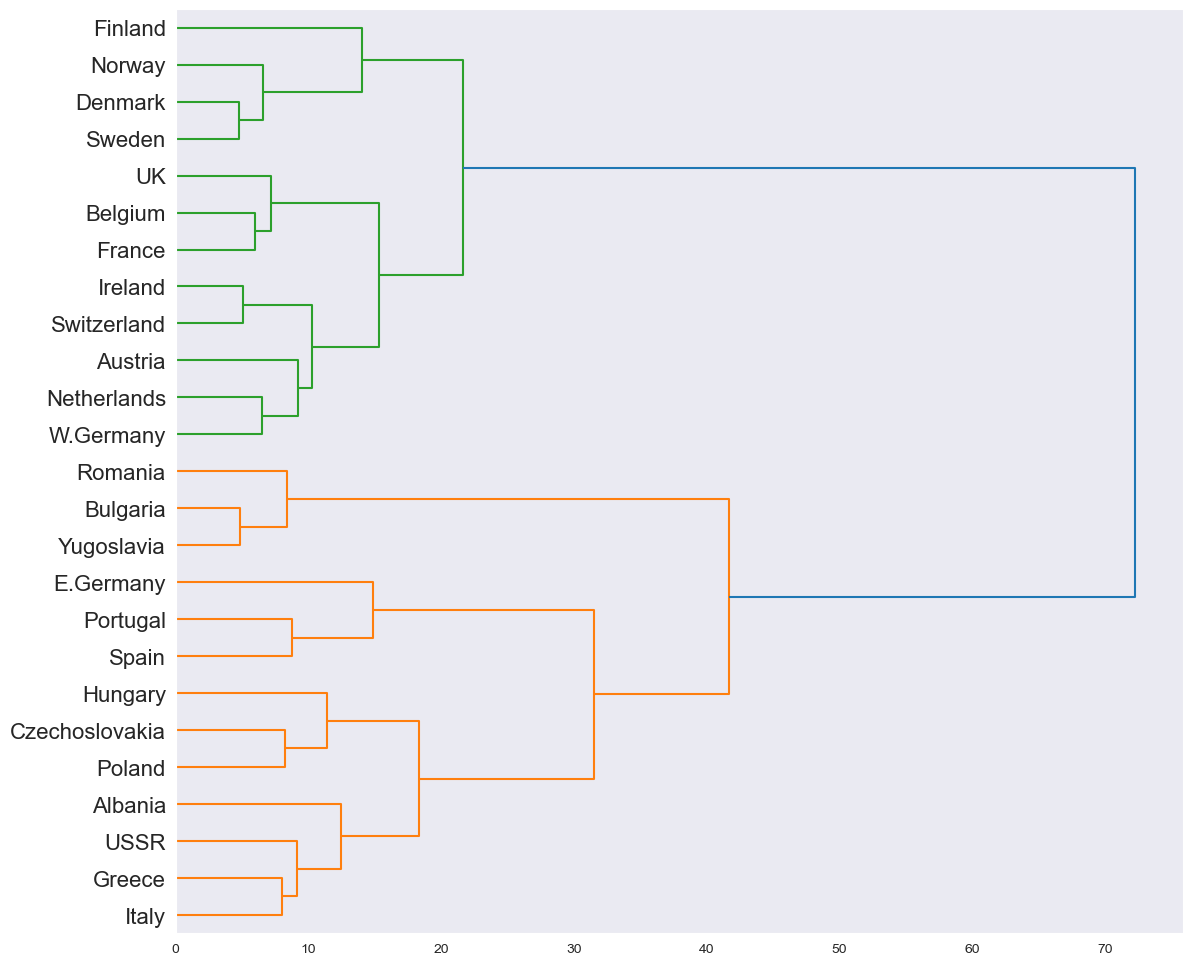

In [12]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

From the dendrogram, we can observe two distinct clusters colored green and yellow. This result indicates that countries in each cluster get their protein from similar sources.

Using the fcluster function, we can find and add the cluster labels for each country to the data frame.

In [13]:
df['Clusters'] = fcluster(Z2, 2, criterion='maxclust')

df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg,Clusters
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,2
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,2


In [14]:
Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X2)

print(Z1.labels_)

[0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0]


## PCA visualization

In [15]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(X2)

In [18]:
X_scaled_df = pd.DataFrame(X_scaled,columns=df.columns[1:10])

In [19]:
X_scaled_df.head()


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
1,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
2,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
3,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
4,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


<Axes: >

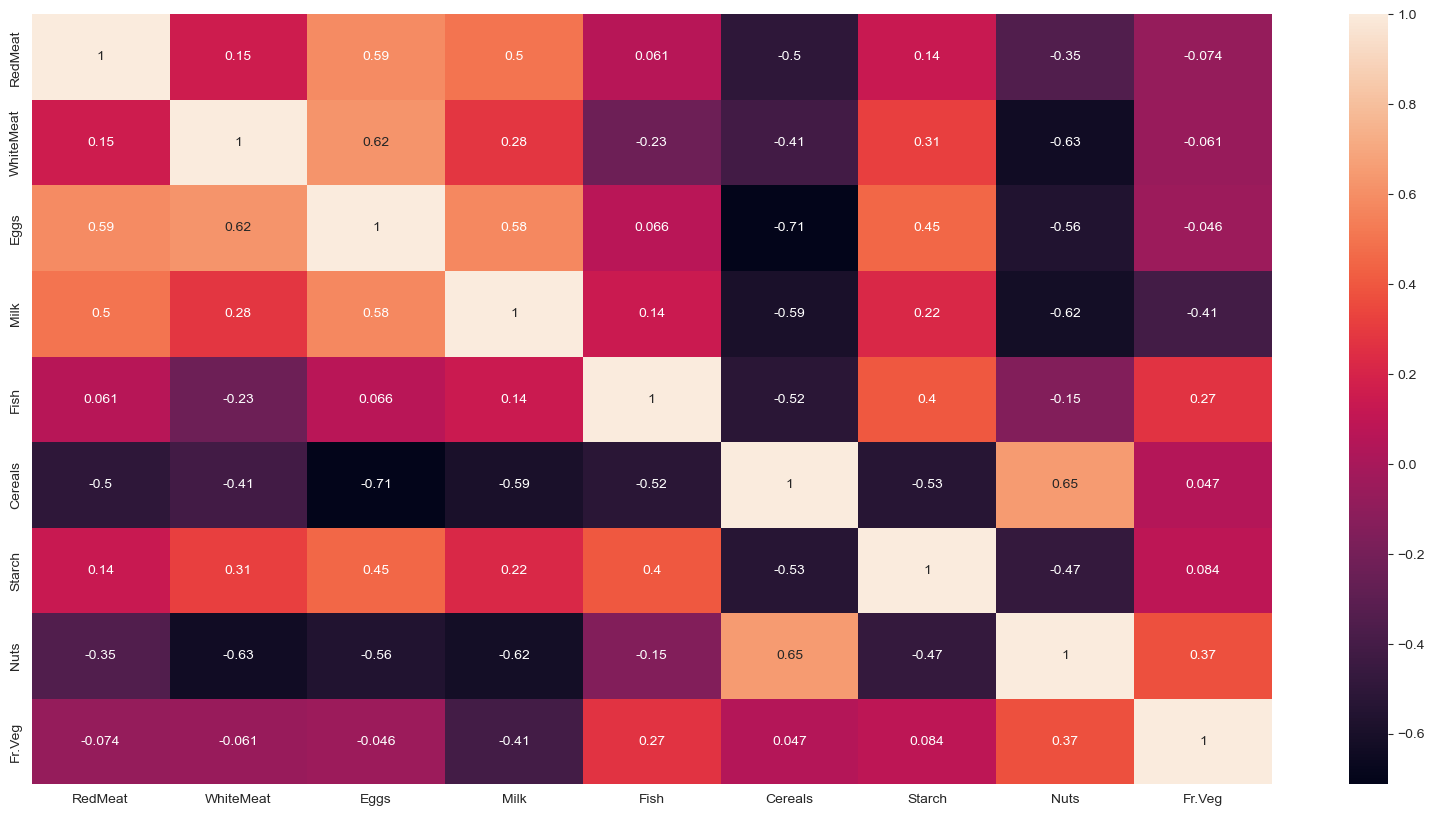

In [20]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(random_state=42)

In [23]:
pca.fit(X_scaled)

PCA(random_state=42)

In [24]:
pca.components_[0]

array([-0.30260939, -0.31055622, -0.42667851, -0.37772728, -0.1356499 ,
        0.43774343, -0.29724767,  0.4203344 ,  0.11041989])

In [25]:
pca.explained_variance_ratio_

array([0.44515973, 0.18166661, 0.12532439, 0.10607377, 0.0515376 ,
       0.03612566, 0.03017848, 0.01292132, 0.01101243])

In [26]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.44515973, 0.62682634, 0.75215073, 0.8582245 , 0.9097621 ,
       0.94588776, 0.97606624, 0.98898757, 1.        ])

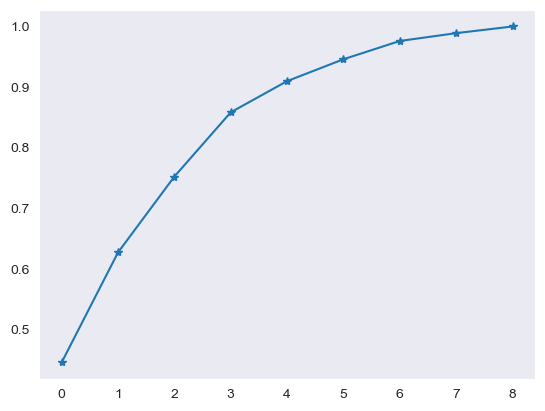

In [27]:
plt.plot(var_cumu,'-*')

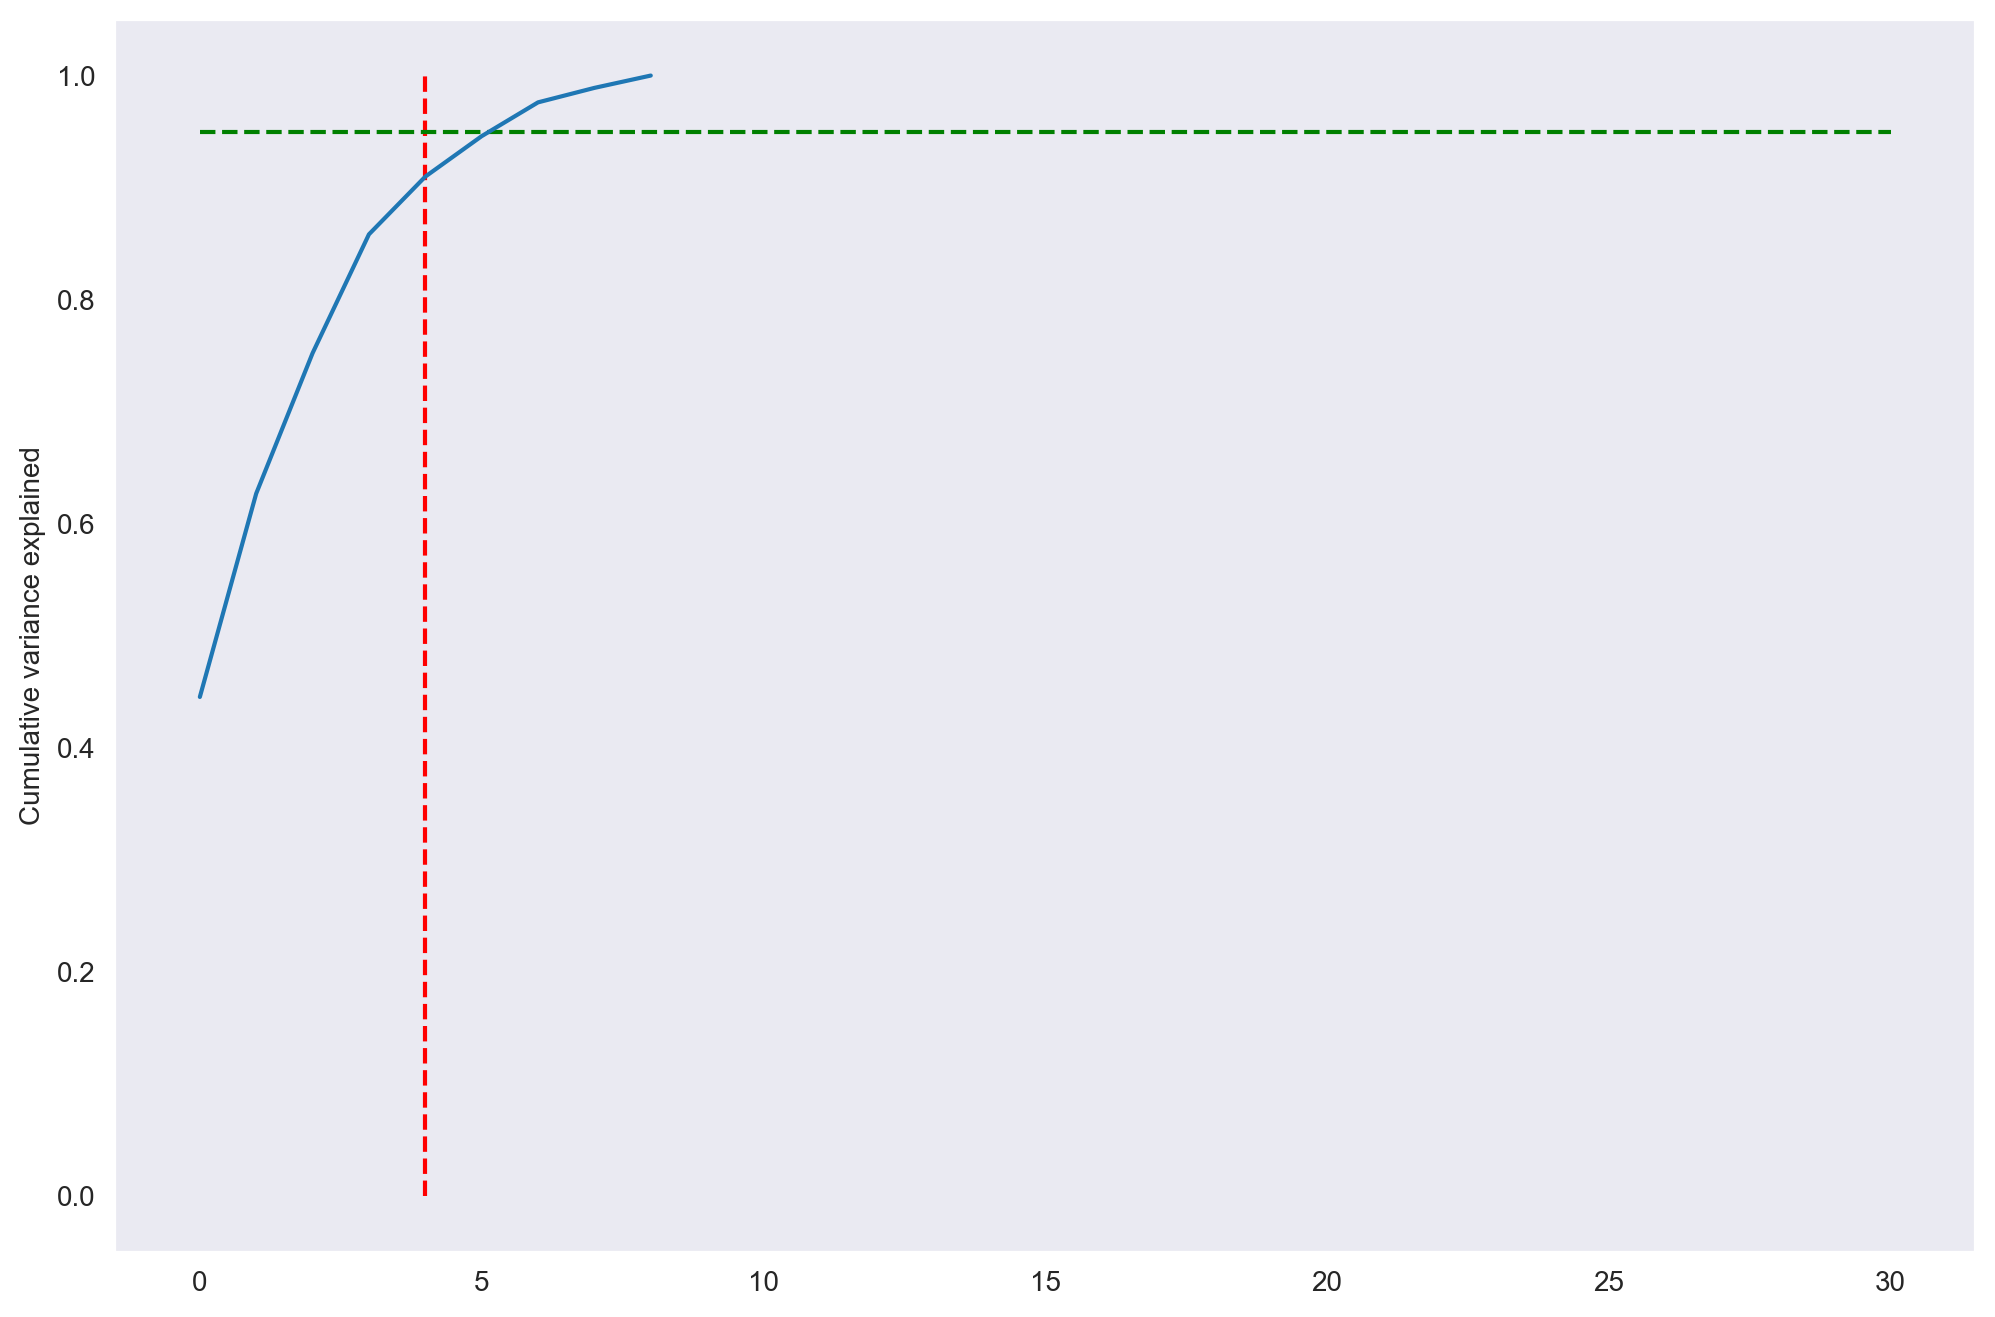

In [28]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [29]:
from sklearn.decomposition import IncrementalPCA

In [30]:
pca_final = IncrementalPCA(n_components=2)

In [31]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [32]:
corrmat = np.corrcoef(X_pca_final.transpose())

<Axes: >

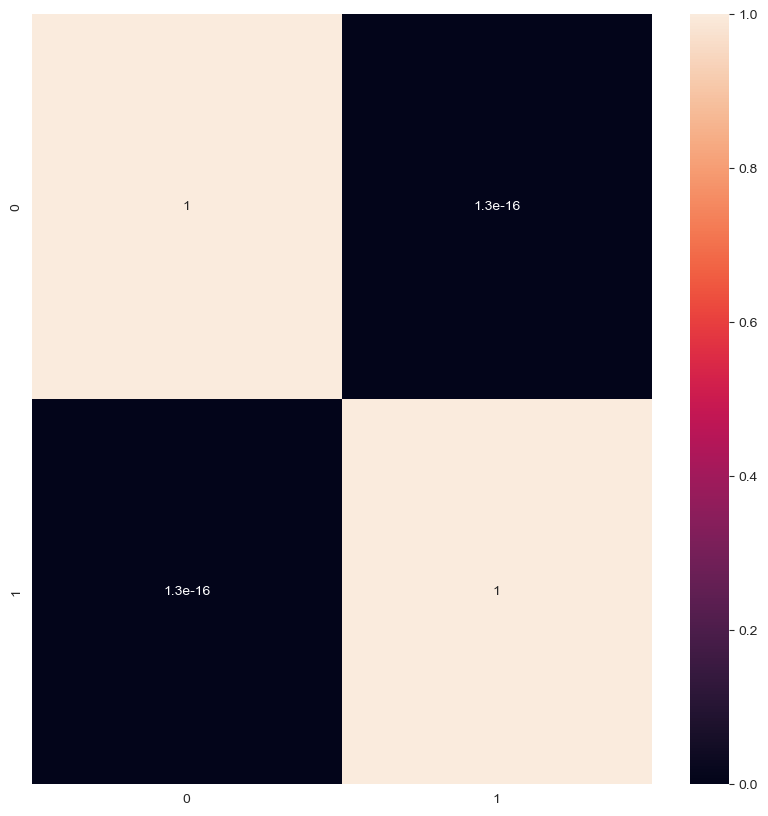

In [33]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [34]:
X_pca_final

array([[ 3.55723814, -1.66410153],
       [-1.45200587, -1.06270224],
       [-1.65547983,  0.16278449],
       [ 3.19870836, -1.32789455],
       [-0.37810388, -0.61509588],
       [-2.41404237,  0.29133192],
       [-1.45153787,  0.45958638],
       [-1.5961042 , -0.60829255],
       [-1.51866569,  0.80155997],
       [ 2.28588421,  1.02170143],
       [ 1.48749325, -0.83277665],
       [-2.71840037, -0.77945466],
       [ 1.5662092 ,  0.40721449],
       [-1.67529322, -0.9307968 ],
       [-0.994802  ,  0.8389795 ],
       [-0.12438256,  0.54270685],
       [ 1.74102993,  4.37737493],
       [ 2.81365985, -1.14185552],
       [ 1.33885786,  2.60617968],
       [-1.66741865, -0.21166087],
       [-0.93113082, -0.76654602],
       [-1.77115274, -0.09591736],
       [ 0.79873424, -0.11305431],
       [-2.13701166, -0.29983694],
       [ 3.69771671, -1.05943374]])

In [35]:
Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
 
Z1.fit_predict(X2)

print(Z1.labels_)

[0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0]


In [36]:
X_pca_final_df=pd.DataFrame(X_pca_final,columns=['PC1','PC2'])

In [37]:
X_pca_final_df['cluster']=Z1.labels_

<Axes: xlabel='PC1', ylabel='PC2'>

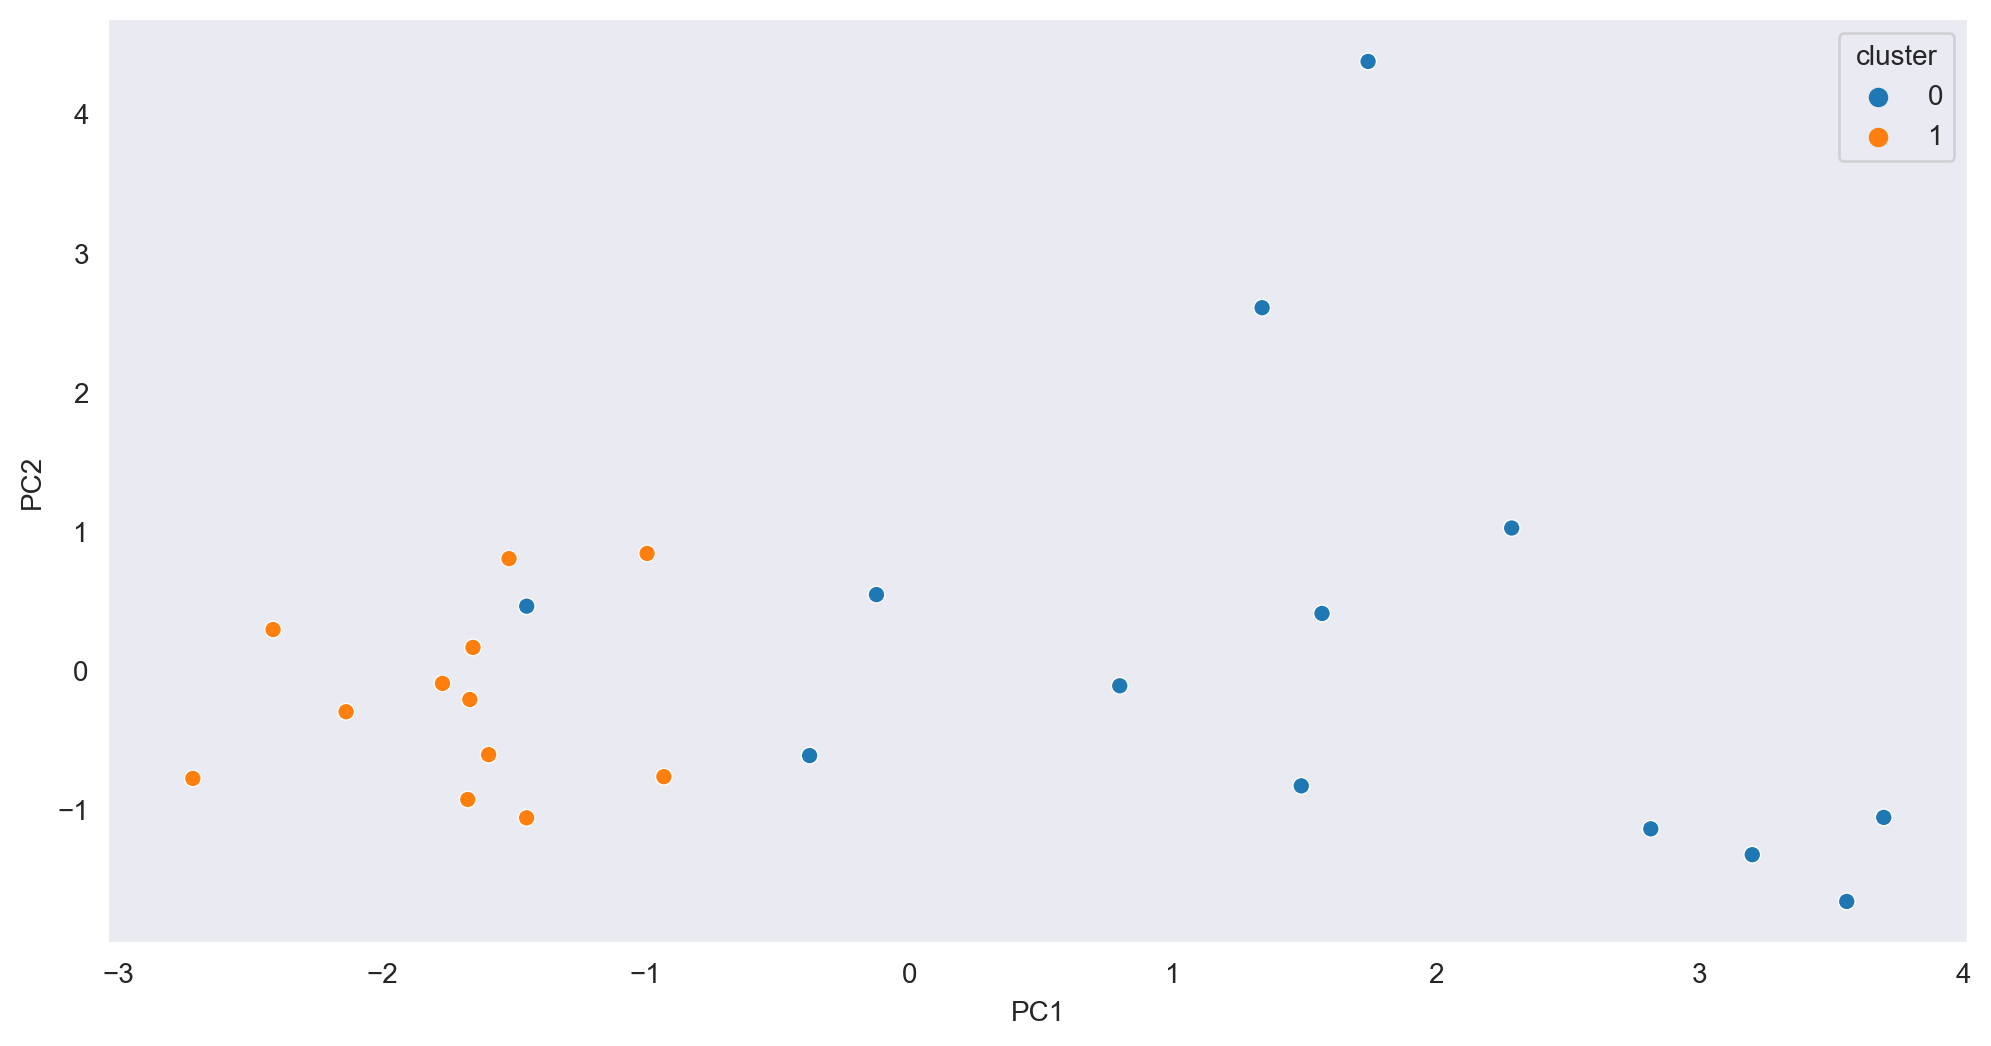

In [38]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,1,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='cluster')
